# Exploration 05
---
## kaggle 참가해보기

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

print('clear! 😆')

clear! 😆


In [103]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

print('clear! 😆')

clear! 😆


In [4]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [5]:
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [6]:
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


타겟 데이터에 해당하는 `price` 컬럼을 `train`에서 지우고 `y`변수에 저장<br>

In [7]:
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


일련번호에 해당하는 `id` 컬럼 지우기

In [8]:
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


_테스트 데이터도 마찬가지_

In [9]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

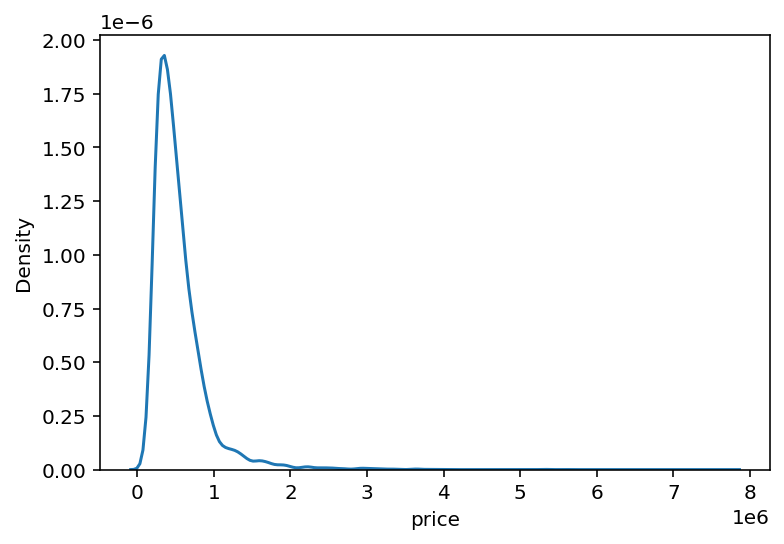

In [10]:
sns.kdeplot(y)
plt.show()

데이터가 왼쪽으로 많이 치우쳐저 있는 상태이므로 log scale 진행

In [11]:
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

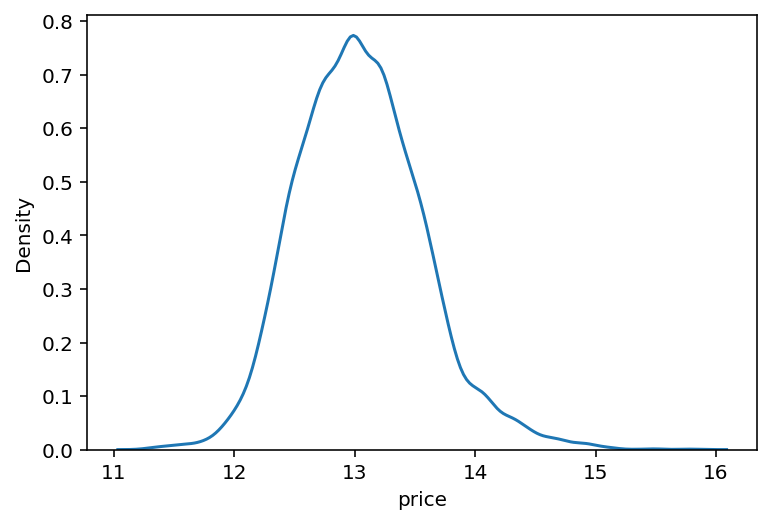

In [12]:
sns.kdeplot(y)
plt.show()

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

## RSME 계산하기

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [99]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))


log scale을 하였기 때문에 다시 원래 데이터의 단위로 되돌려주기

In [101]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [98]:
# random_state는 모델초기화나 데이터셋 구성에 사용되는 랜덤 시드값 
#random_state=None    # 이게 초기값입니다. 아무것도 지정하지 않고 None을 넘겨주면 모델 내부에서 임의로 선택합니다.  
random_state=2020        # 하지만 우리는 이렇게 고정값을 세팅해 두겠습니다. 

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

In [18]:
gboost.__class__.__name__

'GradientBoostingRegressor'

In [19]:
df = {}

for model in models:
    # 모델 이름 획득
    model_name = model.__class__.__name__

    # train, test 데이터셋 분리 - 여기에도 random_state를 고정합니다. 
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)

    # 예측 결과의 rmse값 저장
    df[model_name] = rmse(y_test, y_pred)
    
    # data frame에 저장
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
df

{'GradientBoostingRegressor': 128360.19649691365,
 'XGBRegressor': 110318.66956616656,
 'LGBMRegressor': 111920.36735892233,
 'RandomForestRegressor': 125487.07102453562}

In [20]:
def get_scores(models, train, y):
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
            
    return score_df

get_scores(models, train, y)

,RMSE
GradientBoostingRegressor,128360.196497
RandomForestRegressor,125487.071025
LGBMRegressor,111920.367359
XGBRegressor,110318.669566


### GridSearchCV

In [21]:
from sklearn.model_selection import GridSearchCV


얍💢


`GridSearchCV`란, 사람이 먼저 하이퍼 파라미터의 값을 정해두고, 그 값들로 만들어질 수 있는 모든 조합을 탐색한다. 특정값에 대한 하이퍼 파라미터 조합을 탐색하고자 할 때 유리하다.

In [22]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

In [102]:
model = LGBMRegressor(random_state=random_state)

In [24]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results


In [93]:
param_grid = {
    'n_estimators': [300],
    'learning_rate' : [0.05],
    'num_leaves' : [31],
    'max_depth': [-1],
    
    'num_iterations' : [900, 1000, 1100],
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use i

,learning_rate,max_depth,n_estimators,num_iterations,num_leaves,score,RMSLE
0,0.05,-1,300,900,31,-0.026030,0.161339
1,0.05,-1,300,1000,31,-0.026047,0.161392
2,0.05,-1,300,1100,31,-0.026113,0.161596


In [96]:
model = LGBMRegressor(max_depth=-1, learning_rate = 0.05, n_estimators=300, num_iterations = 1100, num_leaves = 31, random_state=random_state)


In [31]:
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
    
    # sample 파일에 예측값 덮어쓰기
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction

    # 진행했던 RMSLE 값을 넣어 저장하기
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [97]:
# 진행했던 RMSLE 값을 넣어 저장하기
save_submission(model, train, y, test, 'lgbm', rmsle='0.161596')

/aiffel/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.161596.csv saved!
[CV] END learning_rate=0.05, max_depth=-1, n_estimators=400, num_iterations=1000, num_leaves=63; total time=   6.9s
[CV] END learning_rate=0.05, max_depth=-1, n_estimators=300, num_iterations=900, num_leaves=31; total time=   5.6s
[CV] END learning_rate=0.05, max_depth=-1, n_estimators=300, num_iterations=1000, num_leaves=31; total time=   4.8s
[CV] END learning_rate=0.05, max_depth=-1, n_estimators=300, num_iterations=1100, num_leaves=31; total time=   5.0s
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[CV] END bagging_fraction=0.9, feature_fraction=0.9, learning_rate=0.055, max_depth=-1, n_estimators=100, num_iterations=1000; total time=   4.7s
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will

|num_iterations|RMSLE|Private Score|
|---|---|---|
|900|0.161339|110232
|1000|0.161392|110044
|1100|0.161596|109852

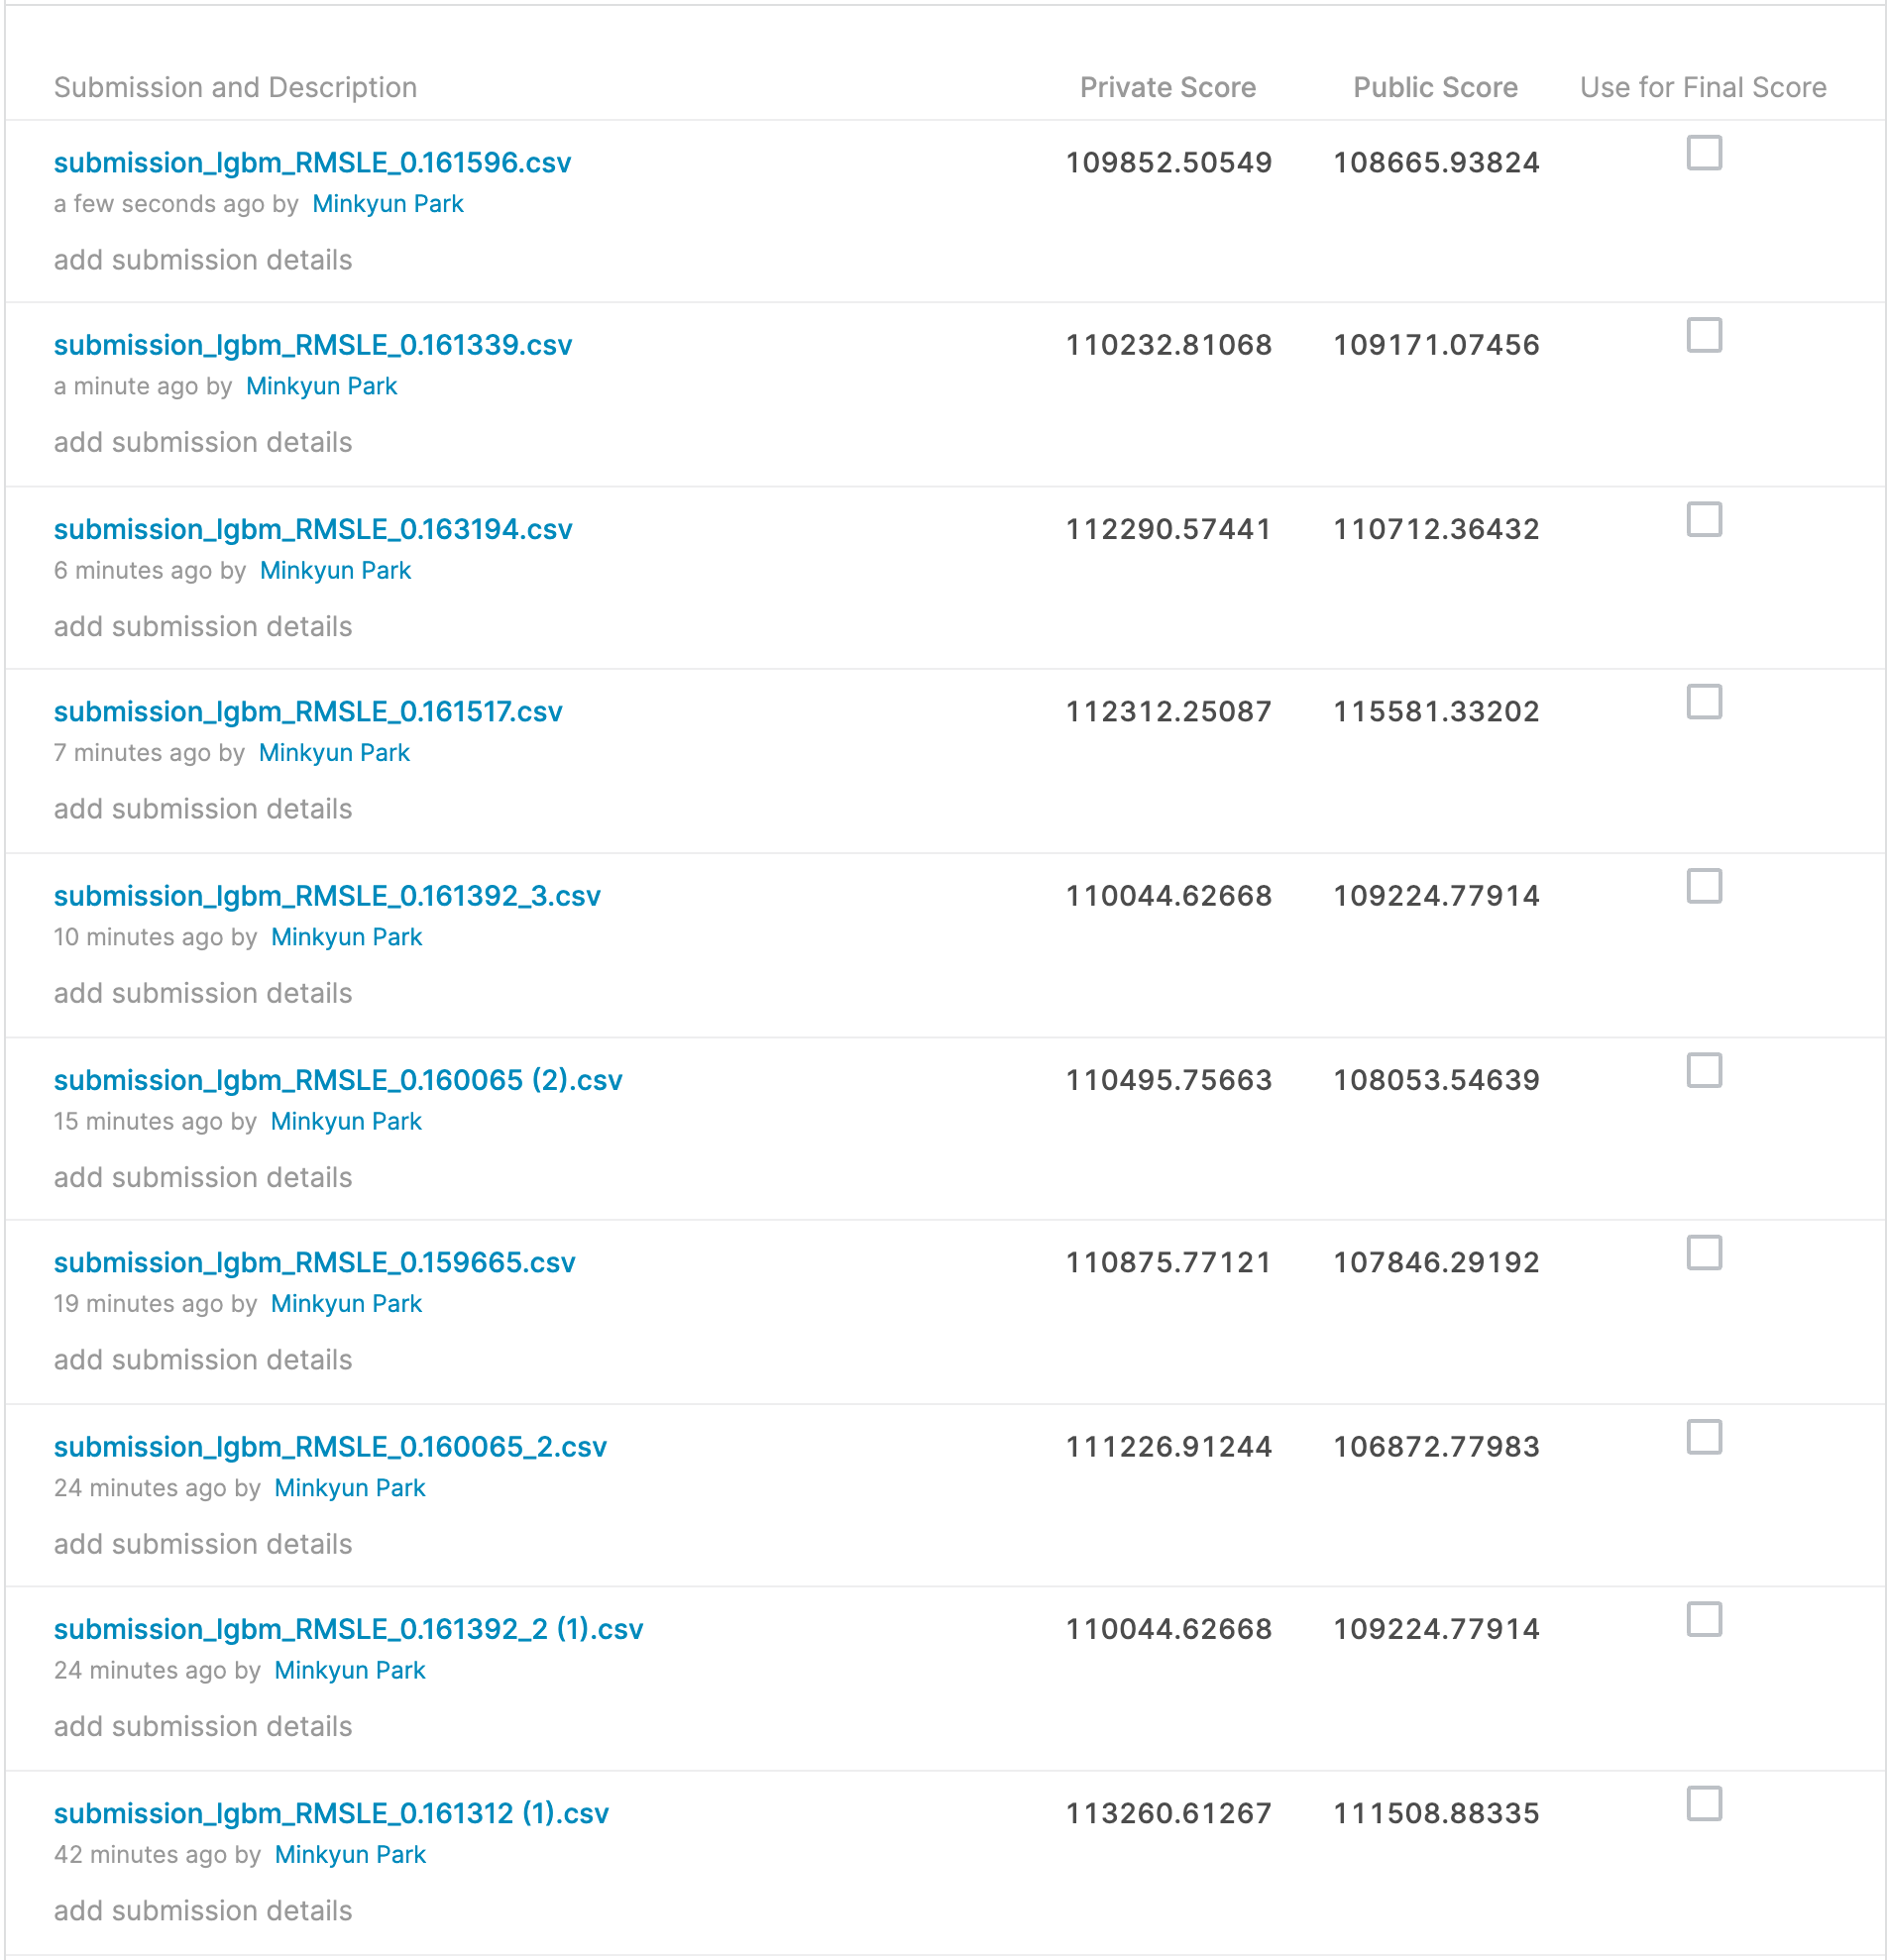

# 회고

## 1. 평가
baseline 코드를 대부분 이용하였고, 이 중에서도 LightGBM 모델을 활용하여 집값을 예측하는 코드를 작성하였다. LightBGM에는 수많은 파라미터들이 존재하지만 어차피 ensemble 형식이기 때문에 구조 자체가 맞춰져 파라미터를 조절에도 큰 차이가 없을 수 있다. <br><br>
프로젝트를 진행할 때, RMSLE Score가 낮은 파라미터들을 기준으로 csv 파일을 저장하여 제출 하였지만, 실제로 RMSLE Score가 작다고 반드시 kaggle에 upload한 Private Score 가 낮게 나오는 것은 아니었다. 위 캡쳐된 사진을 확인하면 RMSLE Score가 가장 낮았을 때는 0.159665인데, 바로 위의 0.160065 일 때 보다도 Private Score가 높게 나오는 것을 확인할 수 있다. 또한 Public Score와 Private Score의 상관관계가 선형적이지 않은 것을 볼 수 있다. Public Score가 가장 낮게 나왔을 때에는 106872로, Private Score가 가장 낮게 나온 109852의 Public Score 에 비하여 2000점 가까이 낮은 것을 볼 수 있다. <br><br>
조정해준 파라미터들은 `num_iterations`, `learning_Rate`, `num_leaves`, `max_depth`, `bagging_fraction`, `feature_fraction`으로, `max_depth`는 default 값인 `-1`로 하였지만, `-1`로 하기전 진행했던 코드들과 비교 했을 때, `50`으로 했어도 결과는 똑같았을 것이라 추측한다. `num_leaves` 는 `[15, 31, 63]` 모두 해 보았으나, RMSLE SCORE 자체는 `15`일 때 가장 낮게 나오지만, Private Score는 `31` 일 때가 가장 낮게 나왔다. `bagging_fraction`, `feature_fraction` 도 비슷한 맥락으로, Score 자체는 해당 파라미터들을 `0.7` ~ `0.9` 사이 값으로 사용 하였을 때 Score가 더 낮게 나왔지만 Private Score는 아예 사용하지 않았을 때가 더 낮게 나왔다. 프로젝트를 진행하면서 가장 유의미 했던 파라미터는 `learning_Rate`와 `num_iterations`로, `learning_Rate` 의 경우, `0.01` 부터 `0.1` 사이 값으로 비교하였고, `0.05` 부근에서 가장 점수가 좋게 나왔으며, `0.045` 일 때가 `0.05` 일때보다 점수는 좋게 나왔지만 그다지 큰 차이가 없어 `0.05` 값으로 고정하였다. `num_iterations`는 이번 프로젝트를 진행하는데에 있어 결정적이었던 파라미터로, 값을 `1000` 까지 올렸을 때, Public Score가 크게 떨어진 것을 체감할 수 있었다. 또한 마지막에 `900` 부터 `1100` 까지 다시 비교한 결과 Private Score를 11만점 이하로 떨어뜨릴 수 있었다.

## 2. 후기 
RMSLE Score만 좋게 나오면 된다고 생각해서 시간이 더욱 오래걸렸던 것 같다. 아직 자세하게는 알지 못하는 LightBGM을 쓰면서 앙상블에 대한 이해가 부족했던 것 같다. 또한 이번에는 LightBGM Regressor를 사용하였지만, 일전의 코드에서 비교한 Gradient Boosting Regressor, XGBRegressor, RandomForestRegressor 에 대해서도 다시 코드를 작성해보는 시간을 가지면 좋을 것 같다.

## 3. Reference
[1] http://machinelearningkorea.com/2019/09/29/lightgbm-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0/